In [1]:
# we first load the module

import dipolarBEC


In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[0.01116174 0.01116174 0.01116172 0.0111617  0.01116168 0.01116165
 0.01116161 0.01116157 0.01116152 0.01116147 0.01116142 0.01116136
 0.01116129 0.01116122 0.01116115 0.01116107 0.01116099 0.0111609
 0.01116081 0.01116071 0.01116062 0.01116052 0.01116041 0.01116031
 0.0111602  0.01116009 0.01115998 0.01115986 0.01115975 0.01115963
 0.01115951 0.01115939 0.01115927 0.01115914 0.01115902 0.0111589
 0.01115877 0.01115865 0.01115852 0.0111584  0.01115827 0.01115815
 0.01115803 0.0111579  0.01115778 0.01115766 0.01115754 0.01115742
 0.01115731 0.01115719 0.01115707 0.01115696 0.01115685 0.01115674
 0.01115663 0.01115652 0.01115642 0.01115632 0.01115621 0.01115612
 0.01115602 0.01115592 0.01115583 0.01115574 0.01115565 0.01115556
 0.01115548 0.0111554  0.01115532 0.01115524 0.01115517 0.01115509
 0.01115502 0.01115496 0.01115489 0.01115483 0.01115477 0.01115471
 0.01115465 0.0111546  0.01115455 0.0111545  0.01115445 0.01115441
 0.01115437 0.01115433 0.0111543  0.01115426 0.01115423 0.011154

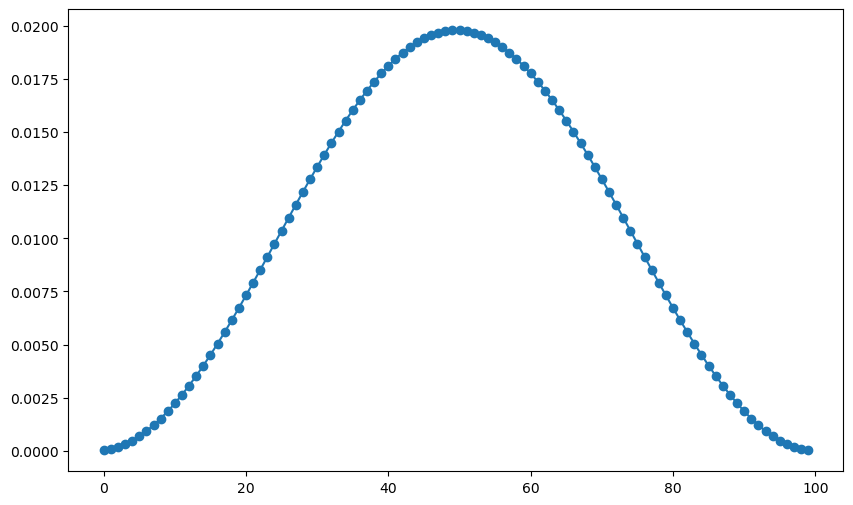

In [3]:
# first try: just run for a fixed 

from scipy.optimize import curve_fit

Ntubes = 100
kx = 0.1
Uc = 1.0
Ud = 0.1
Ndisr = 100
sigma = 0

run1 = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

print( run1.IPRAllDisr() )
print( run1.IPRDisr() )

def func(x, a, L):
    return a * np.exp(x/L)

xdata = range(len(run1.wfLowestState()))
print(len(xdata))
ydata = run1.wfLowestState()
print(len(ydata))

popt, pcov = curve_fit(func, xdata, ydata)
# Print the optimal parameters a, L
print("Optimal parameters are: a=%f, L=%f" % (popt[0], popt[1]))

plt.figure(figsize=(10,6))
plt.plot(xdata, ydata, marker='o')
plt.show()

In [ ]:
# now we would like to make fancy plots

In [4]:
# load modules
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [11]:
# we're plotting the spatial (y-axis) distribution of the lowest wavefunction for three values of N=10,100,1000, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.01
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.0
kx_large = 10.0
Uc = 1.0
Ndisr = 100
N1=100
N2=125
N3=150

wf1_sk = []
wf2_sk = []
wf3_sk = []

wf1_lk = []
wf2_lk = []
wf3_lk = []

run1_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
run2_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
run3_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

run1_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
run2_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
run3_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


wf1_sk = run1_sk.wfLowestState()
wf2_sk = run2_sk.wfLowestState()
wf3_sk = run3_sk.wfLowestState()


wf1_lk = run1_lk.wfLowestState()
wf2_lk = run2_lk.wfLowestState()
wf3_lk = run3_lk.wfLowestState()

fold-v2 (100,) (200,)
fold-v2 (125,) (250,)
fold-v2 (150,) (300,)
fold-v2 (100,) (200,)
fold-v2 (125,) (250,)
fold-v2 (150,) (300,)


range(0, 150)


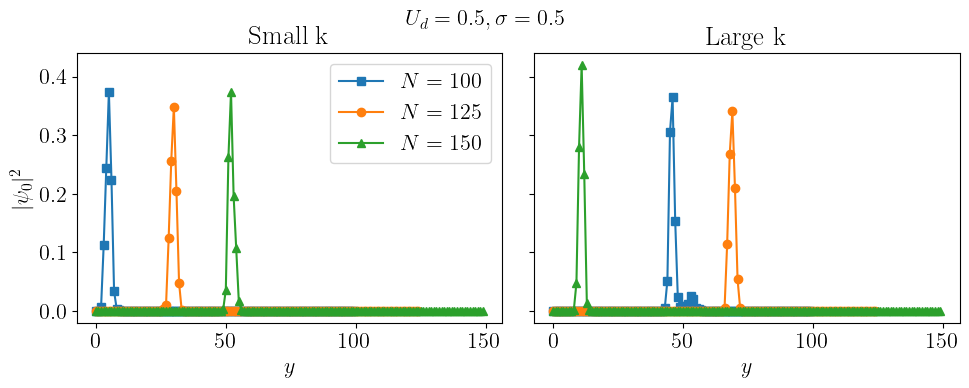

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

xdata1s = range(len(wf1_sk))
xdata2s = range(len(wf2_sk))
xdata3s = range(len(wf3_sk))

xdata1l = range(len(wf1_lk))
xdata2l = range(len(wf2_lk))
xdata3l = range(len(wf3_lk))

print(xdata3s)


ax1.plot(xdata1s , wf1_sk, label=r'$N = {}$'.format(N1), marker='s')
ax1.plot(xdata2s , wf2_sk, label=r'$N = {}$'.format(N2), marker='o')
ax1.plot(xdata3s , wf3_sk, label=r'$N = {}$'.format(N3), marker='^')

ax1.set_ylabel(r"$|\psi_0|^2$")
ax1.set_xlabel(r"$y$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(xdata1l , wf1_lk, label=r'$N = {}$'.format(N1), marker='s')
ax2.plot(xdata2l , wf2_lk, label=r'$N = {}$'.format(N2), marker='o')
ax2.plot(xdata3l , wf3_lk, label=r'$N = {}$'.format(N3), marker='^')

ax2.set_xlabel(r"$y$")
ax2.set_title('Large k')

fig.tight_layout()
fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
plt.savefig(r"wf_$U_d={}_s={}$.pdf".format(Ud, sigma), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [18]:
# we're plotting the IPR vs wavefunction index for three values of N, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.0
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
N1=100
N2=125
N3=150

ipr1_sk = []
ipr2_sk = []
ipr3_sk = []

ipr1_lk = []
ipr2_lk = []
ipr3_lk = []

run1_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
run2_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
run3_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

run1_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
run2_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
run3_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


ipr1_sk = run1_sk.IPRAllDisr()
ipr2_sk = run2_sk.IPRAllDisr()
ipr3_sk = run3_sk.IPRAllDisr()


ipr1_lk = run1_lk.IPRAllDisr()
ipr2_lk = run2_lk.IPRAllDisr()
ipr3_lk = run3_lk.IPRAllDisr()

range(0, 150)


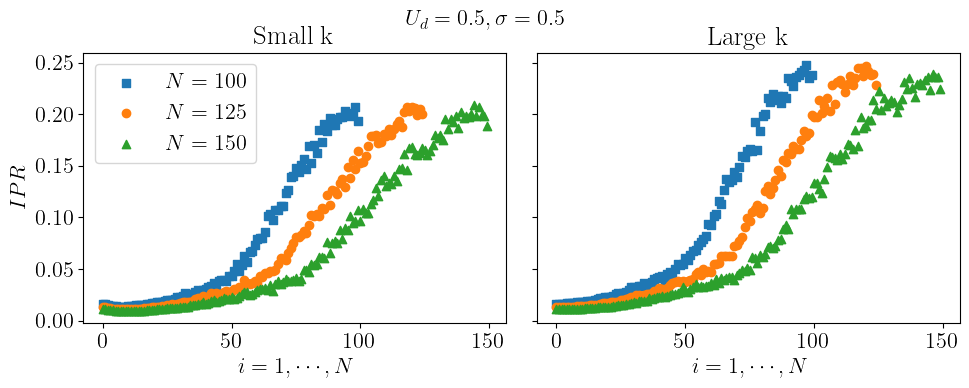

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

xdata1s = range(len(ipr1_sk))
xdata2s = range(len(ipr2_sk))
xdata3s = range(len(ipr3_sk))
xdata1l = range(len(ipr1_lk))
xdata2l = range(len(ipr2_lk))
xdata3l = range(len(ipr3_lk))

print(xdata3s)


ax1.scatter(xdata1s , ipr1_sk, label=r'$N = {}$'.format(N1), marker='s')
ax1.scatter(xdata2s , ipr2_sk, label=r'$N = {}$'.format(N2), marker='o')
ax1.scatter(xdata3s , ipr3_sk, label=r'$N = {}$'.format(N3), marker='^')

ax1.set_ylabel(r"$IPR$")
ax1.set_xlabel(r"$i=1,\cdots,N$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.scatter(xdata1l , ipr1_lk, label=r'$N = {}$'.format(N1), marker='s')
ax2.scatter(xdata2l , ipr2_lk, label=r'$N = {}$'.format(N2), marker='o')
ax2.scatter(xdata3l , ipr3_lk, label=r'$N = {}$'.format(N3), marker='^')

ax2.set_xlabel(r"$i=1,\cdots,N$")
ax2.set_title('Large k')

fig.tight_layout()
fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
plt.savefig(r"wf_$U_d={}_s={}$.pdf".format(Ud, sigma), format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [28]:
# we're plotting ALL IPR vs N, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
Ud1 = 0.0
Ud2 = 0.25
Ud3 = 0.5

sigma = sigma3
Ud = Ud3

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
NtAr = [10, 50, 100, 150, 200, 250]

iprN_sk = []
iprN_lk = []


for Ntubes in tqdm(NtAr):

    run_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma)
    run_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma)

    iprN_sk.append( run_sk.IPRAllDisr() )
    iprN_lk.append( run_lk.IPRAllDisr() )


100%|██████████| 6/6 [00:51<00:00,  8.54s/it]


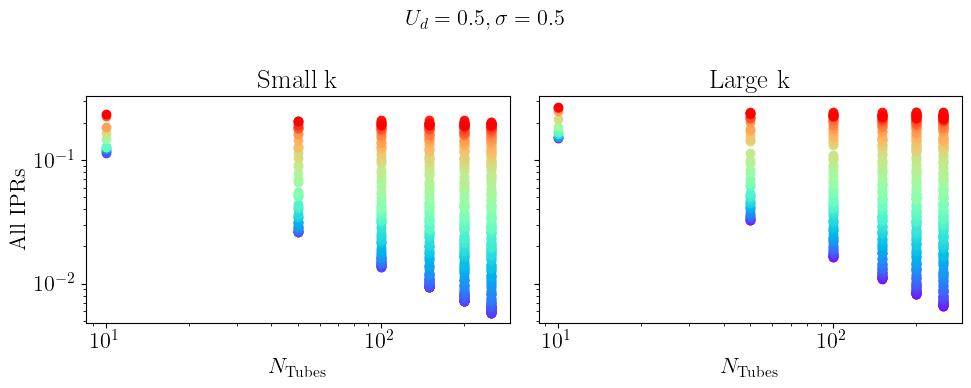

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')


for i in range(len(NtAr)):
    colors = cm.rainbow(np.linspace(0, 1, len(iprN_sk[i])))
    for j in range(len(iprN_sk[i])):
        #color_key = tuple(colors[j])  # Convert numpy array to tuple
        ax1.scatter(NtAr[i] , iprN_sk[i][j], color=colors[j])
        ax2.scatter(NtAr[i] , iprN_lk[i][j], color=colors[j])

ax1.set_ylabel(r"All IPRs")
ax1.set_xlabel(r"$N_{\rm Tubes}$")

ax1.set_title('Small k')
#ax1.legend(loc='best')

ax2.set_xlabel(r"$N_{\rm Tubes}$")
ax2.set_title('Large k')

fig.suptitle(r"$U_d = {}, \sigma = {}$".format(Ud, sigma), fontsize=16)
fig.tight_layout()
#plt.savefig('fig_Nt.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [22]:
# let us look at IPR at fix U, as a function of Ud for three values of sigma
# at small k (_sk) and large k (_lk), for N=100 tubes

sigma = 0
Ntubes = 100
kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
sigma1 = 0.0
sigma2 = 0.25
sigma3 = 0.5
N1=10
N2=100
N3=1000

Udar = np.linspace(0, 0.5, 11)

iprV1_sk = []
iprV2_sk = []
iprV3_sk = []

iprV1_lk = []
iprV2_lk = []
iprV3_lk = []

#wf1_sk = []
#wf2_sk = []
#wf3_sk = []

#wf1_lk = []
#wf2_lk = []
#wf3_lk = []


for Ud in tqdm(Udar):

    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)

    #run1n_sk = dipolarBEC.dipolarBEC(N1, kx_small, Uc, Ud, Ndisr, sigma)
    #run2n_sk = dipolarBEC.dipolarBEC(N2, kx_small, Uc, Ud, Ndisr, sigma)
    #run3n_sk = dipolarBEC.dipolarBEC(N3, kx_small, Uc, Ud, Ndisr, sigma)

    #run1n_lk = dipolarBEC.dipolarBEC(N1, kx_large, Uc, Ud, Ndisr, sigma)
    #run2n_lk = dipolarBEC.dipolarBEC(N2, kx_large, Uc, Ud, Ndisr, sigma)
    #run3n_lk = dipolarBEC.dipolarBEC(N3, kx_large, Uc, Ud, Ndisr, sigma)


    iprV1_sk.append( run1_sk.IPRDisr() )
    iprV2_sk.append( run2_sk.IPRDisr() )
    iprV3_sk.append( run3_sk.IPRDisr() )

    iprV1_lk.append( run1_lk.IPRDisr() )
    iprV2_lk.append( run2_lk.IPRDisr() )
    iprV3_lk.append( run3_lk.IPRDisr() )

    #wf1_sk.append( run1n_sk.wfLowestState() )
    #wf2_sk.append( run2n_sk.wfLowestState() )
    #wf3_sk.append( run3n_sk.wfLowestState() )

    #wf1_lk.append( run1n_lk.wfLowestState() )
    #wf2_lk.append( run2n_lk.wfLowestState() )
    #wf3_lk.append( run3n_lk.wfLowestState() )

100%|██████████| 11/11 [03:35<00:00, 19.61s/it]


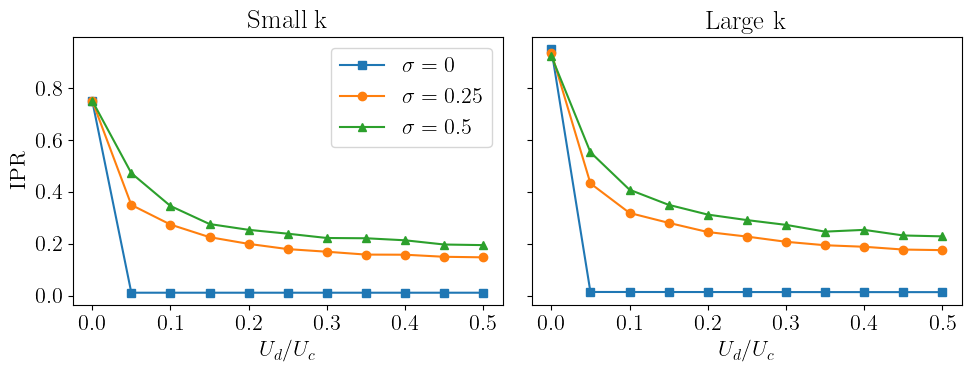

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(Udar , iprV1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(Udar , iprV2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(Udar , iprV3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$U_d/U_c$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(Udar , iprV1_lk, label=r'$\sigma = 0$', marker='s')
ax2.plot(Udar , iprV2_lk, label=r'$\sigma = 0.25$', marker='o')
ax2.plot(Udar , iprV3_lk, label=r'$\sigma = 0.5$', marker='^')

ax2.set_xlabel(r"$U_d/U_c$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Ud.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure

plt.show()

In [24]:
# let us look at IPR at fix U, as a function of \sigma for three values of Ud
# at small k (_sk) and large k (_lk)

Ntubes = 100
kx_small = 0.01
kx_large = 10.0
Uc = 1.0
Ndisr = 100

Ud1 = 0.1
Ud2 = 0.25
Ud3 = 0.5

SigmaAr = np.linspace(0, 0.5, 11)
iprS1_sk = []
iprS2_sk = []
iprS3_sk = []

iprS1_lk = []
iprS2_lk = []
iprS3_lk = []


for sigma in tqdm(SigmaAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud1, Ndisr, sigma)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud2, Ndisr, sigma)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud3, Ndisr, sigma)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud1, Ndisr, sigma)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud2, Ndisr, sigma)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud3, Ndisr, sigma)


    iprS1_sk.append( run1_sk.IPRDisr() )
    iprS2_sk.append( run2_sk.IPRDisr() )
    iprS3_sk.append( run3_sk.IPRDisr() )

    iprS1_lk.append( run1_lk.IPRDisr() )
    iprS2_lk.append( run2_lk.IPRDisr() )
    iprS3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 11/11 [03:33<00:00, 19.39s/it]


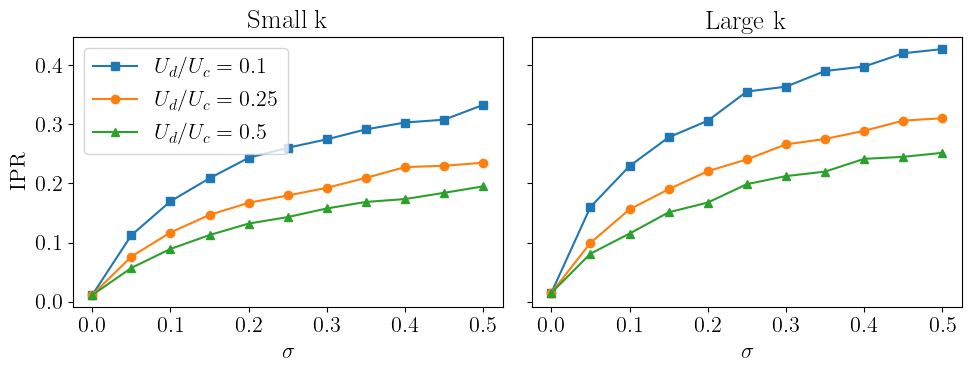

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.plot(SigmaAr , iprS1_sk, label=r'$U_d/U_c = 0.1$', marker='s')
ax1.plot(SigmaAr , iprS2_sk, label=r'$U_d/U_c = 0.25$', marker='o')
ax1.plot(SigmaAr , iprS3_sk, label=r'$U_d/U_c = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$\sigma$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(SigmaAr , iprS1_lk, marker='s')
ax2.plot(SigmaAr , iprS2_lk, marker='o')
ax2.plot(SigmaAr , iprS3_lk, marker='^')

ax2.set_xlabel(r"$\sigma$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Sg.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [26]:
# let us look at IPR at fix U, fix Ud, as a function of Ntubes for three sigma
# at small k (_sk) and large k (_lk)

kx_small = 0.1
kx_large = 2.0
Uc = 1.0
Ndisr = 100
Ud = 0.25

NtAr = [10, 50, 100, 150, 200, 250]

sigma1 = 0.1
sigma2 = 0.25
sigma3 = 0.5

iprN1_sk = []
iprN2_sk = []
iprN3_sk = []

iprN1_lk = []
iprN2_lk = []
iprN3_lk = []


for Ntubes in tqdm(NtAr):
    run1_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma1)
    run2_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma2)
    run3_sk = dipolarBEC.dipolarBEC(Ntubes, kx_small, Uc, Ud, Ndisr, sigma3)

    run1_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma1)
    run2_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma2)
    run3_lk = dipolarBEC.dipolarBEC(Ntubes, kx_large, Uc, Ud, Ndisr, sigma3)


    iprN1_sk.append( run1_sk.IPRDisr() )
    iprN2_sk.append( run2_sk.IPRDisr() )
    iprN3_sk.append( run3_sk.IPRDisr() )

    iprN1_lk.append( run1_lk.IPRDisr() )
    iprN2_lk.append( run2_lk.IPRDisr() )
    iprN3_lk.append( run3_lk.IPRDisr() )


100%|██████████| 6/6 [03:07<00:00, 31.20s/it]


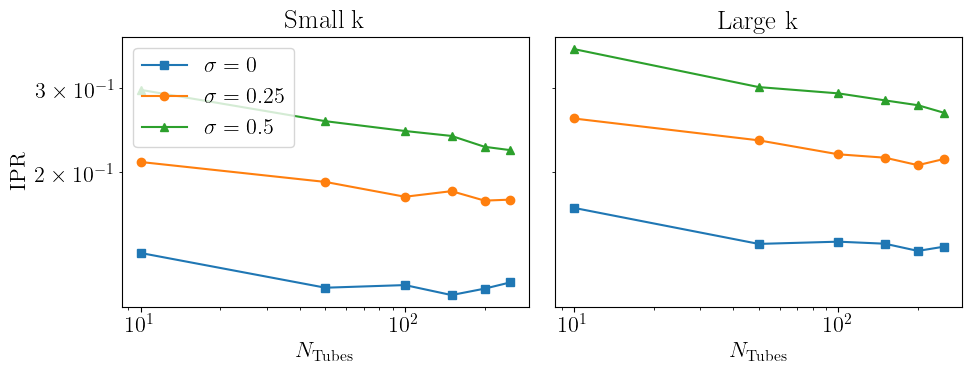

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.plot(NtAr , iprN1_sk, label=r'$\sigma = 0$', marker='s')
ax1.plot(NtAr , iprN2_sk, label=r'$\sigma = 0.25$', marker='o')
ax1.plot(NtAr , iprN3_sk, label=r'$\sigma = 0.5$', marker='^')

ax1.set_ylabel(r"IPR")
ax1.set_xlabel(r"$N_{\rm Tubes}$")

ax1.set_title('Small k')
ax1.legend(loc='best')

ax2.plot(NtAr , iprN1_lk, marker='s')
ax2.plot(NtAr , iprN2_lk, marker='o')
ax2.plot(NtAr , iprN3_lk, marker='^')

ax2.set_xlabel(r"$N_{\rm Tubes}$")
ax2.set_title('Large k')

fig.tight_layout()
plt.savefig('fig_Nt.pdf', format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [ ]:
# fin.